In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance_policy.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,22,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,22,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,22,10404.0,0


### Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.150859,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.343378,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
df.drop(['ID'], axis=1, inplace=True)
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,22,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,22,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,22,10404.0,0


In [6]:
cols = df.columns
for i in cols:
    print(i)
    print(df[i].unique(),"\n")

City_Code
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31'] 

Region_Code
[3213 1117 3732 ... 5326 6149 5450] 

Accomodation_Type
['Rented' 'Owned'] 

Reco_Insurance_Type
['Individual' 'Joint'] 

Upper_Age
[36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40 26 56 35 63
 49 64 67 42 71 57 73 31 19 48 65 54 33 30 69 68 37 29 62 58 38 39 60 41
 45 51 46 70 61 74 53 72 50 47] 

Lower_Age
[36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17] 

Is_Spouse
['No' 'Yes'] 

Health Indicator
['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9'] 

Holding_Policy_Duration
['14+' nan '1' '3' '5' '9' '14' '7' '2' '11' '10' '8' '6' '4' '13' '12'] 

Holding_Policy_Type
[ 3. nan  1.  4.  2.] 

Reco_Policy_Cat
[22

#### 1. Categorical Data- 
##### City_Code, Accomodation_Type, Reco_Insurance_Type, Is_Spouse, Health Indicator, Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat, Response

#### 2. Numerical Data-
##### Region_Code, Upper_Age, Lower_Age, Reco_Policy_Premium

#### Replacing null values with mode.

In [7]:
df.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [8]:
print(df['Holding_Policy_Type'].mode())

0    3.0
Name: Holding_Policy_Type, dtype: float64


In [9]:
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0], inplace=True)
df['Holding_Policy_Type'].isnull().sum()

0

In [10]:
df.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

#### Removing null values by dropping those rows.

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

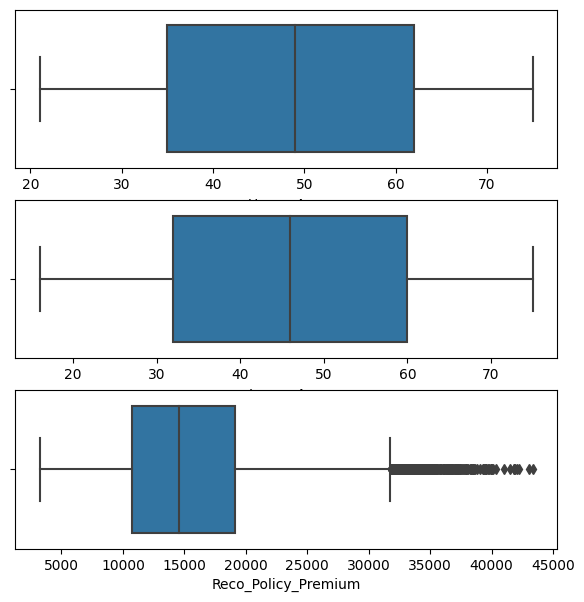

In [13]:
cols = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']

fig, ax = plt.subplots(3,1, figsize = (7, 7))

for i in range(len(cols)):
    sns.boxplot(df, x=cols[i], ax = ax[i])
plt.show()

#### Converting Categorical values to Numerical Values

In [14]:
df = pd.get_dummies(df, columns=['Accomodation_Type'])
df.head()

,City_Code,Region_Code,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Owned,Accomodation_Type_Rented
0,C3,3213,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,0,1
3,C24,4378,Joint,52,48,No,X1,14+,3.0,22,17780.0,0,1,0
4,C8,2190,Individual,44,44,No,X2,3,1.0,22,10404.0,0,0,1
5,C9,1785,Individual,52,52,No,X2,5,1.0,22,15264.0,1,0,1
7,C1,3175,Joint,75,73,Yes,X4,9,4.0,22,29344.0,1,1,0


#### Normalization of Data

In [15]:
df['Reco_Policy_Premium'] = ((df['Reco_Policy_Premium'] - df['Reco_Policy_Premium'].mean())/df['Reco_Policy_Premium'].std())

In [16]:
df['Reco_Policy_Premium'].describe()

count    2.354800e+04
mean     2.018656e-16
std      1.000000e+00
min     -1.900308e+00
25%     -7.332856e-01
50%     -1.292017e-01
75%      5.814853e-01
max      4.354734e+00
Name: Reco_Policy_Premium, dtype: float64